# Problem Statement
### 1.	Backpropagation algorithm in the classical feed-forward artificial neural network. :- Wheat Seed Data set 


Libraies Required

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

### Data Set : Wheat Seed DataSet
#### Data Header >  | Area  | Perimeter | Compactness | Kernel.Length | Kernel.Width | Asymmetry.Coeff | Kernel.Groove | Type |

Data Preprocessing

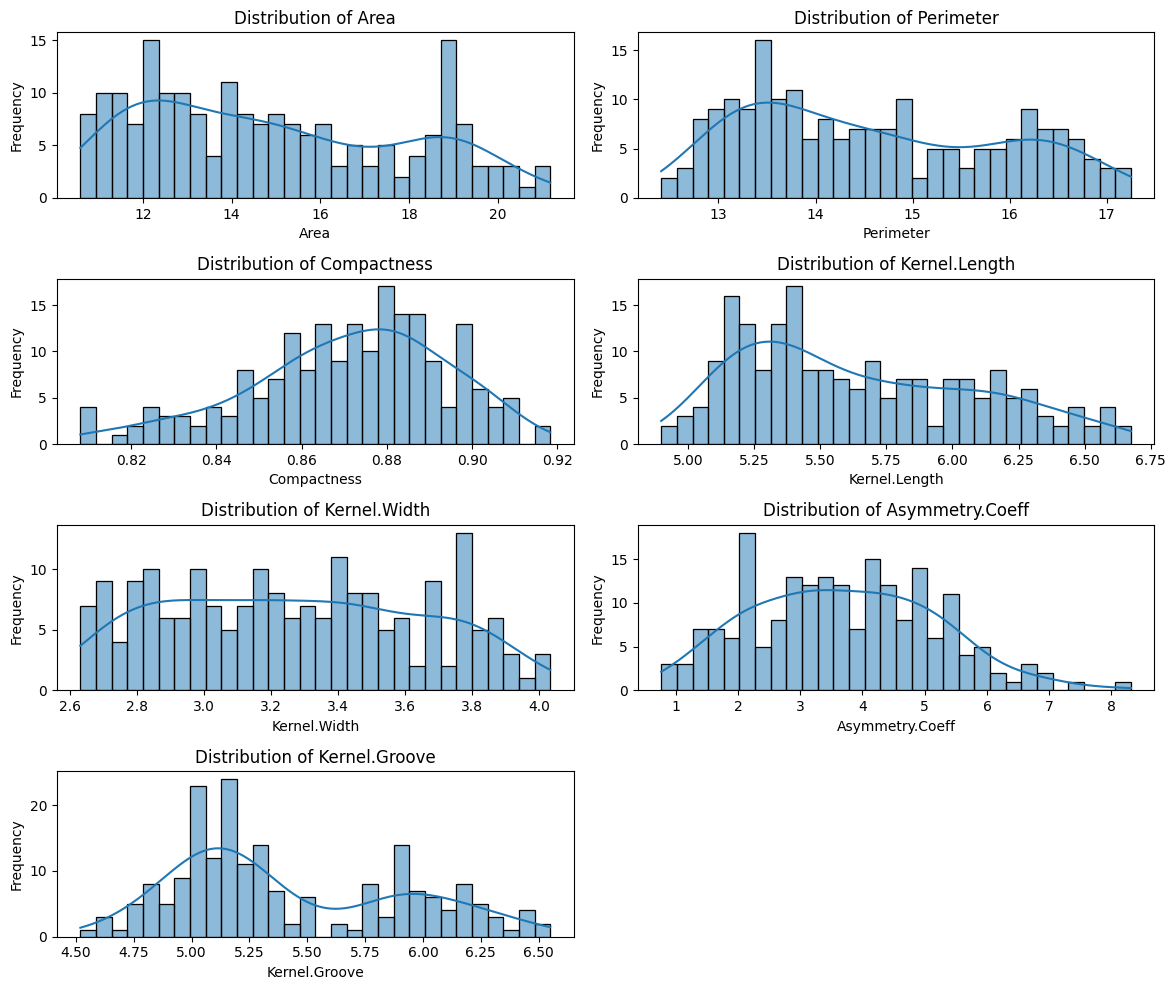

In [11]:
Dataset = "../Data/Wheat-seed/seeds.csv"

df = pd.read_csv(Dataset)
df.head()


num_features = df.columns[:-1]  # Exclude the target variable
num_rows = len(num_features) // 2 + len(num_features) % 2
num_cols = 2
plt.figure(figsize=(12, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [45]:

# Variable Separation 
X = df.iloc[:, 0:7].values
y = df.iloc[:, 7].values

# Train test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Adjust labels to start from 0
y_train = y_train - 1
y_test = y_test - 1


Neural Network Design 

In [46]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax')  # Target classes are 3 hence 
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Training Phase :

In [47]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 0s 44ms/step - loss: 1.0617 - accuracy: 0.3228 - val_loss: 1.0093 - val_accuracy: 0.5625
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.9475 - accuracy: 0.6220 - val_loss: 0.8860 - val_accuracy: 0.8125
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.8414 - accuracy: 0.8031 - val_loss: 0.7809 - val_accuracy: 0.8750
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.7561 - accuracy: 0.8110 - val_loss: 0.6923 - val_accuracy: 0.8750
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.6834 - accuracy: 0.8189 - val_loss: 0.6196 - val_accuracy: 0.9062
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6214 - accuracy: 0.8425 - val_loss: 0.5598 - val_accuracy: 0.9062
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.5707 - accuracy: 0.8583 - val_loss: 0.5100 - val_accuracy: 0.9062
Epoch 8/50
4/4 [===========

Metrics 

2/2 [==============================] - 0s 6ms/step - loss: 0.3155 - accuracy: 0.8750
Test loss: 0.3154889941215515
Test accuracy: 0.875
2/2 [==============================] - 0s 2ms/step


<Axes: >

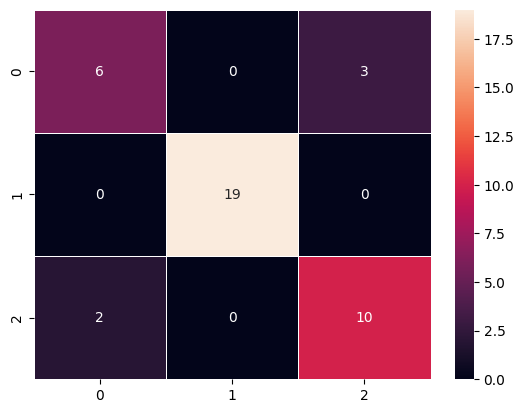

In [50]:
# Evaluate the performance of the trained model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Predict on the test set
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predicted_labels)
sns.heatmap(cm, annot=True, fmt="d",  linewidths=.5)

